In [1]:
from pylab import *
import numpy as np

from PIL import Image

In [2]:
THRESHOLD = 127

In [3]:
array(Image.open('datasets/digit/0.png').convert('L'))

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [4]:
def convert_image2bw(image):
    
    bw_image = image.copy()
    
    for i, row in enumerate(bw_image):
        for j, value in enumerate(row):
            if bw_image[i][j] <= THRESHOLD:
                bw_image[i][j] = 0
            else:
                bw_image[i][j] = 255
    return bw_image

In [5]:
def convert_image2bw_10(image):
    
    bw_image = image.copy()
    
    for i, row in enumerate(bw_image):
        for j, value in enumerate(row):
            if bw_image[i][j] <= THRESHOLD:
                bw_image[i][j] = 1
            else:
                bw_image[i][j] = 0
    return bw_image

In [6]:
result = convert_image2bw(array(Image.open('datasets/digit/0.png').convert('L')))

In [7]:
result[25]

array([255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
       255, 255, 255, 255], dtype=uint8)

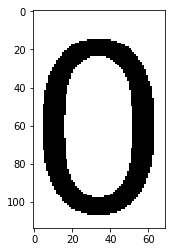

In [8]:
imshow(result, cmap="gray")

In [9]:
# Algorithm can be seen here: https://rosettacode.org/wiki/Zhang-Suen_thinning_algorithm
# |P9|P2|P3| 
# |P8|P1|P4| 
# |P7|P6|P5| 

class ImageThinner:
    
    def __init__(self):
        self.X_TRANSLATION = [0, 1, 1, 1, 0, -1, -1, -1]
        self.Y_TRANSLATION = [-1, -1, 0, 1, 1, 1, 0, -1]


    def neighbors(self, image, x, y):
        """
        Param: image is represented in array
        Return neighbors of a pixel 
        """
        result = []
        for i in range(len(self.X_TRANSLATION)):
            result.append(image[y + self.Y_TRANSLATION[i]][x + self.X_TRANSLATION[i]])
        return result

    def transitions(self, neighbors):
        """
        The number of transitions from white to black in a sequence of
        P2, P3, P4, P5, P6, P7, P8, P9, P2
        """
        neighbors_check = neighbors + neighbors[0:1]
        result = 0
            
        for i in range(len(neighbors_check) - 1):
            if neighbors_check[i] > THRESHOLD and neighbors_check[i + 1] <= THRESHOLD:
                result += 1
        
        return result

    def count_black_pixel(self, neighbors):
        """
        The number of black pixel neighbors
        """
        result = 0
        for i in neighbors:
            if i <= THRESHOLD:
                result += 1
        
        return result

    def thin_image(self, image):
        """
        Thin the image
        """
        
        thinned_image = image.copy()

        list_of_change_1 = list_of_change_2 = 1

        while list_of_change_1 or list_of_change_2:
            rows, column = thinned_image.shape

            # First Condition
            list_of_change_1 = []
            for y in range(1, rows - 1):
                for x in range(1, column - 1):
                    P2, P3, P4, P5, P6, P7, P8, P9 = neighbors_list = self.neighbors(thinned_image, x, y)

                    
                    if (thinned_image[y][x] <= THRESHOLD and
                        2 <= self.count_black_pixel(neighbors_list) <= 6 and
                        self.transitions(neighbors_list) == 1 and
                        (P2 > THRESHOLD or P4 > THRESHOLD or P6 > THRESHOLD) and
                        (P4 > THRESHOLD or P6 > THRESHOLD or P8 > THRESHOLD)):
                        
                        list_of_change_1.append((y, x))

            for y, x in list_of_change_1:
                thinned_image[y][x] = 255                

            # Second Condition
            list_of_change_2 = []
            for y in range(1, rows - 1):
                for x in range(1, column - 1):
                    P2, P3, P4, P5, P6, P7, P8, P9 = neighbors_list = self.neighbors(thinned_image, x, y)

                    if (thinned_image[y][x] <= THRESHOLD and
                        2 <= self.count_black_pixel(neighbors_list) <= 6 and
                        self.transitions(neighbors_list) == 1 and
                        (P2 > THRESHOLD or P4 > THRESHOLD or P8 > THRESHOLD) and
                        (P2 > THRESHOLD or P6 > THRESHOLD or P8 > THRESHOLD)):
                        
                        list_of_change_2.append((y, x))

            for y, x in list_of_change_2:
                thinned_image[y][x] = 255


        return thinned_image

In [10]:
image_thinner = ImageThinner()

In [11]:
data = convert_image2bw_10(array(Image.open('datasets/digit/1.png').convert('L')))

In [12]:
result = image_thinner.thin_image(convert_image2bw(array(Image.open('datasets/digit/2.png').convert('L'))))
result

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

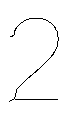

In [13]:
Image.fromarray(result)

In [14]:
result.shape

(114, 70)

In [15]:
result2 = result.copy()
result2

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [16]:
result2.shape


(114, 70)

In [17]:
X_TRANSLATION = [0, 1, 1, 1, 0, -1, -1, -1]
Y_TRANSLATION = [-1, -1, 0, 1, 1, 1, 0, -1]

def neighbors(y, x):
    """
    Param: image is represented in array
    Return neighbors of a pixel 
    """
    result = []
    for i in range(len(X_TRANSLATION)):
        result.append((y + Y_TRANSLATION[i],x + X_TRANSLATION[i]))
    return result
print(neighbors(1, 2))

[(0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (2, 1), (1, 1), (0, 1)]


In [18]:
def find_endpoint(result2):
    endpoint = []
    (rows, cols) = result2.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if result2[i][j] == 0:

                neighbor_point = neighbors(i, j)

                counter = 0
                for point in neighbor_point:
                    if result2[point[0]][point[1]] == 0:
                        counter += 1

                if counter == 1:
                    endpoint.append((i, j))
    return endpoint
endpoint = find_endpoint(result2)

In [19]:
x = []
y = []
for i,j in endpoint:
    x.append(j)
    y.append(i)

In [20]:
def find_intersection(result2):
    intersection = []
    (rows, cols) = result2.shape
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            if result2[i][j] == 0:

                neighbor_point = neighbors(i, j)

                counter = 0
                for point in neighbor_point:
                    if result2[point[0]][point[1]] == 0:
                        counter += 1

                if counter > 2:
                    intersection.append((i, j))
    return intersection
intersection = find_intersection(result2)

In [21]:
xi = []
yi = []
for i,j in intersection:
    xi.append(j)
    yi.append(i)

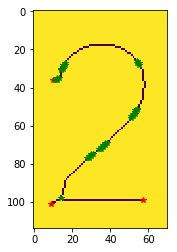

In [22]:
imshow(result2)

plot(x,y,'r*')
plot(xi, yi, 'g*')
show()

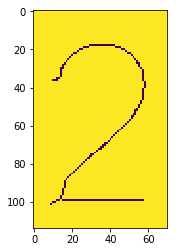

In [23]:
imshow(result2)

In [24]:
def prune_image(result2):
    distance_threshold = 20
    marker = True
    counter = 0
    endpoint = find_endpoint(result2)
    intersection = find_intersection(result2)    
    while (marker):
        figure(counter + 1)
        counter += 1
        min_distance = 255
        for i, j in intersection:
            for y, x in endpoint:
                distance = abs(j - x) + abs(i - y)
                if min_distance > distance:
                    min_distance = distance
                if distance <= distance_threshold:
                    result2[y][x] = 255
        endpoint = find_endpoint(result2)
        intersection = find_intersection(result2)
        if min_distance > distance_threshold or counter > 4:
            marker=False

        imshow(result2)

        xi = []
        yi = []
        for i,j in intersection:
            xi.append(j)
            yi.append(i)

        x = []
        y = []
        for i,j in endpoint:
            x.append(j)
            y.append(i)

        plot(x,y,'r*')
        plot(xi, yi, 'g*')
        show()
    return result2

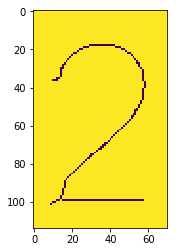

In [25]:
imshow(result2)

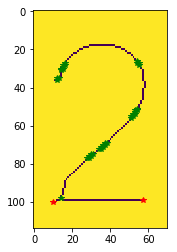

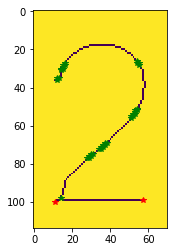

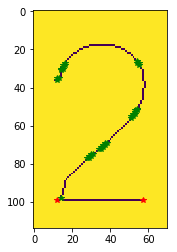

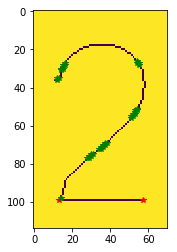

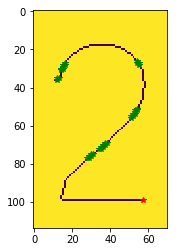

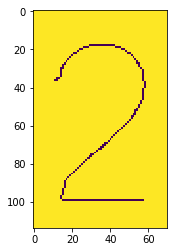

In [26]:
prune_result2 = prune_image(result2)
imshow(prune_result2)

In [27]:
def convert2zero_one(result2):
    for index1, rows in enumerate(result2):
        for index2, value in enumerate(rows):
            if result2[index1][index2] == 0:
                result2[index1, index2] = 1
            else:
                result2[index1, index2] = 0
    return result2
result2 = convert2zero_one(result2)

In [28]:
from __future__ import division

# Author: Jean KOSSAIFI <jean.kossaifi@gmail.com>

import numpy as np
from numpy import arctan2, fliplr, flipud


def gradient(image, same_size=False):
    """ Computes the Gradients of the image separated pixel difference
    
    Gradient of X is computed using the filter 
        [-1, 0, 1]
    Gradient of X is computed using the filter 
        [[1,
          0,
          -1]]
    Parameters
    ----------
    image: image of shape (imy, imx)
    same_size: boolean, optional, default is True
        If True, boundaries are duplicated so that the gradients
        has the same size as the original image.
        Otherwise, the gradients will have shape (imy-2, imx-2)
        
    Returns
    -------
    (Gradient X, Gradient Y), two numpy array with the same shape as image
        (if same_size=True)
    """
    sy, sx = image.shape
    if same_size:
        gx = np.zeros(image.shape)
        gx[:, 1:-1] = -image[:, :-2] + image[:, 2:]
        gx[:, 0] = -image[:, 0] + image[:, 1]
        gx[:, -1] = -image[:, -2] + image[:, -1]
    
        gy = np.zeros(image.shape)
        gy[1:-1, :] = image[:-2, :] - image[2:, :]
        gy[0, :] = image[0, :] - image[1, :]
        gy[-1, :] = image[-2, :] - image[-1, :]
    
    else:
        gx = np.zeros((sy-2, sx-2))
        gx[:, :] = -image[1:-1, :-2] + image[1:-1, 2:]

        gy = np.zeros((sy-2, sx-2))
        gy[:, :] = image[:-2, 1:-1] - image[2:, 1:-1]
    
    return gx, gy


def magnitude_orientation(gx, gy):
    """ Computes the magnitude and orientation matrices from the gradients gx gy
    Parameters
    ----------
    gx: gradient following the x axis of the image
    gy: gradient following the y axis of the image
    
    Returns 
    -------
    (magnitude, orientation)
    
    Warning
    -------
    The orientation is in degree, NOT radian!!
    """
        
    magnitude = np.sqrt(gx**2 + gy**2)
    orientation = (arctan2(gy, gx) * 180 / np.pi) % 360
            
    return magnitude, orientation


def compute_coefs(csx, csy, dx, dy, n_cells_x, n_cells_y):
    """
    Computes the coefficients for the bilinear (spatial) interpolation
    
    Parameters
    ----------
    csx: int
        number of columns of the cells
    csy: int
        number of raws dimension of the cells
    sx: int
        number of colums of the image (x axis)
    sy: int
        number of raws of the image (y axis)
    n_cells_x: int
        number of cells in the x axis
    n_cells_y: int
        number of cells in the y axis
    
    Notes
    -----
    We consider an image: image[y, x] (NOT image[x, y]!!!)
    
    /!\ csx and csy must be even number
    
    Using the coefficients
    ----------------------
    The coefficient correspond to the interpolation in direction of the upper left corner of the image.
    In other words, if you interpolate img, and res is the result of your interpolation, you should do
    
    res = zeros(n_cells_y*pixels_per_cell, n_cells_x*pixels_per_cell)
        with (csx, csy) the number of pixels per cell
         and dx, dy = csx//2, csy//2
    res[:-dx, :-dy] += img[dx:, dy:]*coefs
    
    then you rotate the coefs and do the same thing for every part of the image
    """
    if csx != csy:
        raise NotImplementedError("For now compute_coefs is only implemented for squared cells (csx == csy)")
        
        ################################
        #####     /!\ TODO  /!|    #####
        ################################

    else: # Squared cells
        # Note: in this case, dx = dy, we differentiate them only to make the code clearer
        
        # We want a squared coefficients matrix so that it can be rotated to interpolate in every direction
        n_cells = max(n_cells_x, n_cells_y)
        
        # Every cell of this matrix corresponds to (x - x_1)/dx 
        x = (np.arange(dx)+0.5)/csx
        
        # Every cell of this matrix corresponds to (y - y_1)/dy
        y = (np.arange(dy)+0.5)/csy
        
        y = y[np.newaxis, :]
        x = x[:, np.newaxis]

        # CENTRAL COEFFICIENT
        ccoefs = np.zeros((csy, csx))

        ccoefs[:dy, :dx] = (1 - x)*(1 - y)
        ccoefs[:dy, -dx:] = fliplr(y)*(1 - x)
        ccoefs[-dy:, :dx] = (1 - y)*flipud(x)
        ccoefs[-dy:, -dx:] = fliplr(y)*flipud(x)

        coefs = np.zeros((csx*n_cells - dx, csy*n_cells - dy))
        coefs[:-dy, :-dx] = np.tile(ccoefs, (n_cells - 1, n_cells - 1))

        # REST OF THE BORDER
        coefs[:-dy, -dx:] = np.tile(np.concatenate(((1 - x), np.flipud(x))), (n_cells - 1, dy))
        coefs[-dy:, :-dx] = np.tile(np.concatenate(((1 - y), np.fliplr(y)), axis=1), (dx, n_cells - 1))
        coefs[-dy:, -dx:] = 1

        return coefs


def interpolate_orientation(orientation, sx, sy, nbins, signed_orientation):
    """ interpolates linearly the orientations to their corresponding bins
    Parameters
    ----------
    sx: int
        number of columns of the image (x axis)
    sy: int
        number of raws of the image (y axis)
    nbins : int, optional, default is 9
        Number of orientation bins.
    signed_orientation: bool, default is True
        if True, sign information of the orientation is preserved,
            ie orientation angles are between 0 and 360 degree.
        if False, the angles are between 0 and 180 degree.
    Returns
    -------
    pre-histogram: array of shape (sx, sy, nbins)
            contains the pre histogram of orientation built using linear interpolation
            to interpolate the orientations to their bins
    """
    
    if signed_orientation:
        max_angle = 360
    else:
        max_angle = 180
    
    b_step = max_angle/nbins
    b0 = (orientation % max_angle) // b_step
    b0[np.where(b0>=nbins)]=0
    b1 = b0 + 1
    b1[np.where(b1>=nbins)]=0
    b = np.abs(orientation % b_step) / b_step
    
    #linear interpolation between the bins
    # Coefficients corresponding to the bin interpolation
    # We go from an image to a higher dimension representation of size (sizex, sizey, nbins)
    temp_coefs = np.zeros((sy, sx, nbins))
    for i in range(nbins):
        temp_coefs[:, :, i] += np.where(b0==i, (1 - b), 0)
        temp_coefs[:, :, i] += np.where(b1==i, b, 0)
    
    return temp_coefs


def per_pixel_hog(image, dy=2, dx=2, signed_orientation=False, nbins=9, flatten=False, normalise=True):
    """ builds a histogram of orientation for a cell centered around each pixel of the image
    
    Parameters
    ---------
    image: numpy array of shape (sizey, sizex)
    dx   : the cell around each pixel in the x axis will have size 2*dx+1
    dy   : the cell around each pixel in the y axis will have size 2*dy+1
    signed_orientation: bool, default is True
        if True, sign information of the orientation is preserved,
            ie orientation angles are between 0 and 360 degree.
        if False, the angles are between 0 and 180 degree.
    nbins : int, optional, default is 9
        Number of orientation bins.
        
    Returns
    -------
    if visualise if True: (histogram of oriented gradient, visualisation image)
    
    histogram of oriented gradient:
        numpy array of shape (n_cells_y, n_cells_x, nbins), flattened if flatten is True
    """
    gx, gy = gradient(image, same_size=True)
    magnitude, orientation = magnitude_orientation(gx, gy)
    sy, sx = image.shape
    orientations_image = interpolate_orientation(orientation, sx, sy, nbins, signed_orientation)
    for j in range(1, dy):
        for i in range(1, dx):
            orientations_image[:-j, :-i, :] += orientations_image[j:, i:, :]
    
    if normalise:
        normalised_blocks = normalise_histogram(orientations_image, 1, 1, 1, 1, nbins)
    else:
        normalised_blocks = orientations_image
    
    if flatten:
        normalised_blocks = normalised_blocks.flatten()

    return normalised_blocks


def interpolate(magnitude, orientation, csx, csy, sx, sy, n_cells_x, n_cells_y, signed_orientation=False, nbins=9):
    """ Returns a matrix of size (cell_size_x, cell_size_y, nbins) corresponding
         to the trilinear interpolation of the pixels magnitude and orientation
    Parameters
    ----------
    csx: int
        number of columns of the cells
    csy: int
        number of raws dimension of the cells
    sx: int
        number of colums of the image (x axis)
    sy: int
        number of raws of the image (y axis)
    n_cells_x: int
        number of cells in the x axis
    n_cells_y: int
        number of cells in the y axis
    signed_orientation: bool, default is True
        if True, sign information of the orientation is preserved,
            ie orientation angles are between 0 and 360 degree.
        if False, the angles are between 0 and 180 degree.
    nbins : int, optional, default is 9
        Number of orientation bins.
    Returns
    -------
    orientation_histogram: array of shape (n_cells_x, n_cells_y, nbins)
            contains the histogram of orientation built using tri-linear interpolation
    """
    
    dx = csx//2
    dy = csy//2
    
    temp_coefs = interpolate_orientation(orientation, sx, sy, nbins, signed_orientation)


    # Coefficients of the spatial interpolation in every direction
    coefs = compute_coefs(csx, csy, dx, dy, n_cells_x, n_cells_y)
    
    temp = np.zeros((sy, sx, nbins))
    # hist(y0, x0)
    temp[:-dy, :-dx, :] += temp_coefs[dy:, dx:, :]*\
        (magnitude[dy:, dx:]*coefs[-(n_cells_y*csy - dy):, -(n_cells_x*csx - dx):])[:, :, np.newaxis]
    
    # hist(y1, x0)
    coefs = np.rot90(coefs)
    temp[dy:, :-dx, :] += temp_coefs[:-dy, dx:, :]*\
        (magnitude[:-dy, dx:]*coefs[:(n_cells_y*csy - dy), -(n_cells_x*csx - dx):])[:, :, np.newaxis]
    
    # hist(y1, x1)
    coefs = np.rot90(coefs)
    temp[dy:, dx:, :] += temp_coefs[:-dy, :-dx, :]*\
        (magnitude[:-dy, :-dx]*coefs[:(n_cells_y*csy - dy), :(n_cells_x*csx - dx)])[:, :, np.newaxis]
    
    # hist(y0, x1)
    coefs = np.rot90(coefs)
    temp[:-dy, dx:, :] += temp_coefs[dy:, :-dx, :]*\
        (magnitude[dy:, :-dx]*coefs[-(n_cells_y*csy - dy):, :(n_cells_x*csx - dx)])[:, :, np.newaxis]
    
    # Compute the histogram: sum over the cells
    orientation_histogram = temp.reshape((n_cells_y, csy, n_cells_x, csx, nbins)).sum(axis=3).sum(axis=1)
    
    return orientation_histogram


def draw_histogram(hist, csx, csy, signed_orientation=False):
    """ simple function to draw an orientation histogram
        with arrows
    """
    import matplotlib.pyplot as plt
    
    if signed_orientation:
        max_angle = 2*np.pi
    else:
        max_angle = np.pi
    
    n_cells_y, n_cells_x, nbins = hist.shape
    sx, sy = n_cells_x*csx, n_cells_y*csy
    plt.close()
    plt.figure()#figsize=(sx/2, sy/2))#, dpi=1)
    plt.xlim(0, sx)
    plt.ylim(sy, 0)
    center = csx//2, csy//2
    b_step = max_angle / nbins
        
    for i in range(n_cells_y):
        for j in range(n_cells_x):
            for k in range(nbins):
                if hist[i, j, k] != 0:
                    width = 1*hist[i, j, k]
                    plt.arrow((center[0] + j*csx) - np.cos(b_step*k)*(center[0] - 1),
                              (center[1] + i*csy) + np.sin(b_step*k)*(center[1] - 1), 
                          2*np.cos(b_step*k)*(center[0] - 1), -2*np.sin(b_step*k)*(center[1] - 1),
                          width=width, color=str(width), #'black',
                          head_width=2.2*width, head_length=2.2*width,
                          length_includes_head=True)
                    
    plt.show()


def visualise_histogram(hist, csx, csy, signed_orientation=False):
    """ Create an image visualisation of the histogram of oriented gradient
    
    Parameters
    ----------
    hist: numpy array of shape (n_cells_y, n_cells_x, nbins)
        histogram of oriented gradient
    csx: int
        number of columns of the cells
    csy: int
        number of raws dimension of the cells
    signed_orientation: bool, default is True
        if True, sign information of the orientation is preserved,
            ie orientation angles are between 0 and 360 degree.
        if False, the angles are between 0 and 180 degree.
    
    Return
    ------
    Image of shape (hist.shape[0]*csy, hist.shape[1]*csx)
    """
    from skimage import draw
    
    if signed_orientation:
        max_angle = 2*np.pi
    else:
        max_angle = np.pi
    
    n_cells_y, n_cells_x, nbins = hist.shape
    sx, sy = n_cells_x*csx, n_cells_y*csy
    center = csx//2, csy//2
    b_step = max_angle / nbins

    radius = min(csx, csy) // 2 - 1
    hog_image = np.zeros((sy, sx), dtype=float)
    for x in range(n_cells_x):
        for y in range(n_cells_y):
            for o in range(nbins):
                centre = tuple([y * csy + csy // 2, x * csx + csx // 2])
                dx = radius * np.cos(o*nbins)
                dy = radius * np.sin(o*nbins)
                rr, cc = draw.line(int(centre[0] - dy),
                                   int(centre[1] - dx),
                                   int(centre[0] + dy),
                                   int(centre[1] + dx))
                hog_image[rr, cc] += hist[y, x, o]
    return hog_image


def normalise_histogram(orientation_histogram, bx, by, n_cells_x, n_cells_y, nbins):
    """ normalises a histogram by blocks
    
    Parameters
    ----------
    bx: int
        number of blocks on the x axis
    by: int
        number of blocks on the y axis
    n_cells_x: int
        number of cells in the x axis
    n_cells_y: int
        number of cells in the y axis
    nbins : int, optional, default is 9
        Number of orientation bins.
     
    The normalisation is done according to Dalal's original thesis, using L2-Hys.
    In other words the histogram is first normalised block-wise using l2 norm, before clipping it by
        limiting the values between 0 and 0.02 and finally normalising again with l2 norm
    """
    eps = 1e-7
    
    if bx==1 and by==1: #faster version
        normalised_blocks = np.clip(
          orientation_histogram / np.sqrt(orientation_histogram.sum(axis=-1)**2 + eps)[:, :, np.newaxis], 0, 0.2)
        normalised_blocks /= np.sqrt(normalised_blocks.sum(axis=-1)**2 + eps)[:, :, np.newaxis]
        
    else:
        n_blocksx = (n_cells_x - bx) + 1
        n_blocksy = (n_cells_y - by) + 1
        normalised_blocks = np.zeros((n_blocksy, n_blocksx, nbins))

        for x in range(n_blocksx):
            for y in range(n_blocksy):
                block = orientation_histogram[y:y + by, x:x + bx, :]
                normalised_blocks[y, x, :] = np.clip(block[0, 0, :] / np.sqrt(block.sum()**2 + eps), 0, 0.2)
                normalised_blocks[y, x, :] /= np.sqrt(normalised_blocks[y, x, :].sum()**2 + eps)

    return normalised_blocks


def build_histogram(magnitude, orientation, cell_size=(8, 8), signed_orientation=False,
         nbins=9, cells_per_block=(1, 1), visualise=False, flatten=False, normalise=True):
    """ builds a histogram of orientation using the provided magnitude and orientation matrices
    
    Parameters
    ---------
    magnitude: np-array of size (sy, sx)
        matrix of magnitude
    orientation: np-array of size (sy, sx)
        matrix of orientations
    csx: int
        number of columns of the cells 
        MUST BE EVEN
    csy: int
        number of raws dimension of the cells
        MUST BE EVEN
    sx: int
        number of colums of the image (x axis)
    sy: int
        number of raws of the image (y axis)
    n_cells_x: int
        number of cells in the x axis
    n_cells_y: int
        number of cells in the y axis
    signed_orientation: bool, default is True
        if True, sign information of the orientation is preserved,
            ie orientation angles are between 0 and 360 degree.
        if False, the angles are between 0 and 180 degree.
    nbins : int, optional, default is 9
        Number of orientation bins.
        
    Returns
    -------
    if visualise if True: (histogram of oriented gradient, visualisation image)
    
    histogram of oriented gradient:
        numpy array of shape (n_cells_y, n_cells_x, nbins), flattened if flatten is True
    visualisation image:
        Image of shape (hist.shape[0]*csy, hist.shape[1]*csx)
    """
    sy, sx = magnitude.shape
    csy, csx = cell_size
    
    # checking that the cell size are even
    if csx % 2 != 0:
        csx += 1
        print("WARNING: the cell_size must be even, incrementing cell_size_x of 1")
    if csy % 2 != 0:
        csy += 1
        print("WARNING: the cell_size must be even, incrementing cell_size_y of 1")
    
    # Consider only the right part of the image
    # (if the rest doesn't fill a whole cell, just drop it)
    sx -= sx % csx
    sy -= sy % csy
    n_cells_x = sx//csx
    n_cells_y = sy//csy
    magnitude = magnitude[:sy, :sx]
    orientation = orientation[:sy, :sx]
    by, bx = cells_per_block
    
    orientation_histogram = interpolate(magnitude, orientation, csx, csy, sx, sy, n_cells_x, n_cells_y, signed_orientation, nbins)
    
    if normalise:
        normalised_blocks = normalise_histogram(orientation_histogram, bx, by, n_cells_x, n_cells_y, nbins)
    else:
        normalised_blocks = orientation_histogram
    
    if flatten:
        normalised_blocks = normalised_blocks.flatten()

    if visualise:
        #draw_histogram(normalised_blocks, csx, csy, signed_orientation)
        return normalised_blocks, visualise_histogram(normalised_blocks, csx, csy, signed_orientation)
    else:
        return normalised_blocks


def histogram_from_gradients(gradientx, gradienty, cell_size=(8, 8), cells_per_block=(1, 1), signed_orientation=False,
        nbins=9, visualise=False, normalise=True, flatten=False, same_size=False):
    """ builds a histogram of oriented gradient from the provided gradients
    Parameters
    ----------
    gradientx : (M, N) ndarray
        Gradient following the x axis
    gradienty: (M, N) ndarray
        Gradient following the y axis
    nbins : int, optional, default is 9
        Number of orientation bins.
    cell_size : 2 tuple (int, int), optional, default is (8, 8)
        Size (in pixels) of a cell.
    cells_per_block : 2 tuple (int,int), optional, default is (2, 2)
        Number of cells in each block.
    visualise : bool, optional, default is False
        Also return an image of the HOG.
    flatten: bool, optional, default is True
    signed_orientation: bool, default is True
        if True, sign information of the orientation is preserved,
            ie orientation angles are between 0 and 360 degree.
        if False, the angles are between 0 and 180 degree.
    normalise: bool, optional, default is True
        if True, the histogram is normalised block-wise
    same_size: bool, optional, default is False
        if True, the boundaries are duplicated when computing the gradients of the image
        so that these have the same size as the original image
    Returns
    -------
    if visualise if True: (histogram of oriented gradient, visualisation image)
    
    histogram of oriented gradient:
        numpy array of shape (n_cells_y, n_cells_x, nbins), flattened if flatten is True
    visualisation image:
        Image of shape (hist.shape[0]*csy, hist.shape[1]*csx)
    References
    ----------
    * http://en.wikipedia.org/wiki/Histogram_of_oriented_gradients
    * Dalal, N and Triggs, B, Histograms of Oriented Gradients for
    Human Detection, IEEE Computer Society Conference on Computer
    Vision and Pattern Recognition 2005 San Diego, CA, USA
    """
    magnitude, orientation = magnitude_orientation(gradientx, gradienty)
    return build_histogram(magnitude, orientation, cell_size=cell_size,
         signed_orientation=signed_orientation, cells_per_block=cells_per_block,
         nbins=nbins, visualise=visualise, normalise=normalise, flatten=flatten)


def hog(image, cell_size=(4, 4), cells_per_block=(1, 1), signed_orientation=False,
        nbins=9, visualise=False, normalise=True, flatten=False, same_size=True):
    """ builds a histogram of oriented gradient (HoG) from the provided image
    Compute a Histogram of Oriented Gradients (HOG) by
    1. computing the gradient image in x and y and deduce from them the magnitude and orientation
        of each pixel
    2. computing gradient histograms (vectorised version)
    3. normalising across blocks
    4. flattening into a feature vector if flatten=True
    Parameters
    ----------
    image : (M, N) ndarray
        Input image (greyscale).
    nbins : int, optional, default is 9
        Number of orientation bins.
    cell_size : 2 tuple (int, int), optional, default is (8, 8)
        Size (in pixels) of a cell.
    cells_per_block : 2 tuple (int,int), optional, default is (2, 2)
        Number of cells in each block.
    visualise : bool, optional, default is False
        Also return an image of the HOG.
    flatten: bool, optional, default is True
    signed_orientation: bool, default is True
        if True, sign information of the orientation is preserved,
            ie orientation angles are between 0 and 360 degree.
        if False, the angles are between 0 and 180 degree.
    normalise: bool, optional, default is True
        if True, the histogram is normalised block-wise
    same_size: bool, optional, default is True
        if True, the boundaries are duplicated when computing the gradients of the image
        so that these have the same size as the original image
    Returns
    -------
    if visualise if True: (histogram of oriented gradient, visualisation image)
    
    histogram of oriented gradient:
        numpy array of shape (n_cells_y, n_cells_x, nbins), flattened if flatten is True
    visualisation image:
        Image of shape (hist.shape[0]*csy, hist.shape[1]*csx)
    References
    ----------
    * http://en.wikipedia.org/wiki/Histogram_of_oriented_gradients
    * Dalal, N and Triggs, B, Histograms of Oriented Gradients for
    Human Detection, IEEE Computer Society Conference on Computer
    Vision and Pattern Recognition 2005 San Diego, CA, USA
    """
    gx, gy = gradient(image, same_size=same_size)
    return histogram_from_gradients(gx, gy, cell_size=cell_size,
         signed_orientation=signed_orientation, cells_per_block=cells_per_block,
         nbins=nbins, visualise=visualise, normalise=normalise, flatten=flatten)

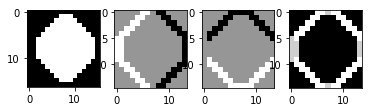

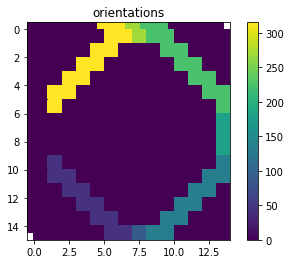

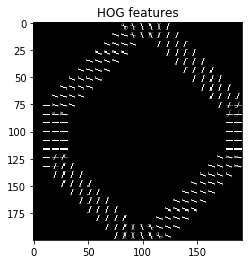

In [29]:
def octagon():
    return np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                     [0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
                     [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

    
img = octagon()
gx, gy = gradient(img, same_size=False)
mag, ori = magnitude_orientation(gx, gy)

# Show gradient and magnitude
plt.figure()
plt.title('gradients and magnitude')
plt.subplot(141)
plt.imshow(img, cmap=plt.cm.Greys_r)
plt.subplot(142)
plt.imshow(gx, cmap=plt.cm.Greys_r)
plt.subplot(143)
plt.imshow(gy, cmap=plt.cm.Greys_r)
plt.subplot(144)
plt.imshow(mag, cmap=plt.cm.Greys_r)


# Show the orientation deducted from gradient
plt.figure()
plt.title('orientations')
plt.imshow(ori)
plt.pcolor(ori)
plt.colorbar()


# Plot histogram 
from scipy.ndimage.interpolation import zoom
# make the image bigger to compute the histogram
im1 = zoom(octagon(), 3)
h = hog(im1, cell_size=(2, 2), cells_per_block=(1, 1), visualise=False, nbins=9, signed_orientation=False, normalise=True)
im2 = visualise_histogram(h, 8, 8, False)

plt.figure()
plt.title('HOG features')
plt.imshow(im2, cmap=plt.cm.Greys_r)

plt.show()

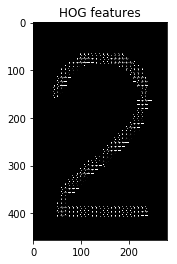

In [30]:
img = result2
gx, gy = gradient(img, same_size=False)
mag, ori = magnitude_orientation(gx, gy)

# Plot histogram 
from scipy.ndimage.interpolation import zoom
# make the image bigger to compute the histogram
im1 = zoom(result2, 1)
h = hog(im1, cell_size=(2, 2), cells_per_block=(1, 1), visualise=False, nbins=9, signed_orientation=False, normalise=True)
im2 = visualise_histogram(h, 8, 8, False)

plt.figure()
plt.title('HOG features')
plt.imshow(im2, cmap=plt.cm.Greys_r)

plt.show()

# Training

In [31]:
import os

In [32]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png')]

In [38]:
path_list = get_imlist('datasets/digit/')
path_list = sorted(path_list)
path_list

['datasets/digit/0.png',
 'datasets/digit/1.png',
 'datasets/digit/2.png',
 'datasets/digit/3.png',
 'datasets/digit/4.png',
 'datasets/digit/5.png',
 'datasets/digit/6.png',
 'datasets/digit/7.png',
 'datasets/digit/8.png',
 'datasets/digit/9.png']

datasets/digit/0.png


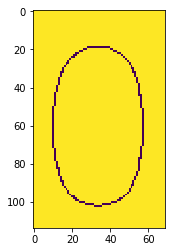

<Figure size 432x288 with 0 Axes>

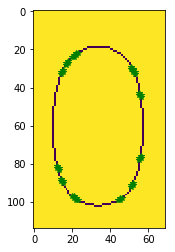

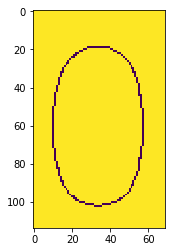

datasets/digit/1.png


<Figure size 432x288 with 0 Axes>

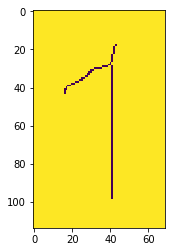

<Figure size 432x288 with 0 Axes>

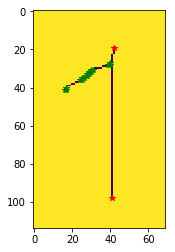

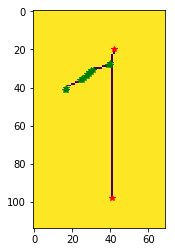

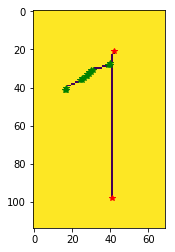

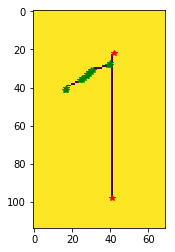

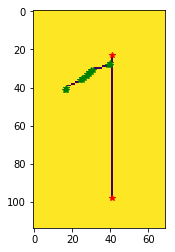

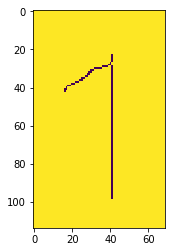

datasets/digit/2.png


<Figure size 432x288 with 0 Axes>

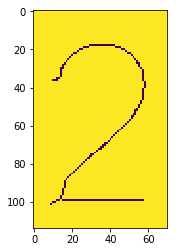

<Figure size 432x288 with 0 Axes>

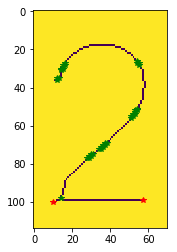

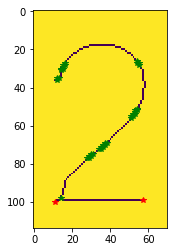

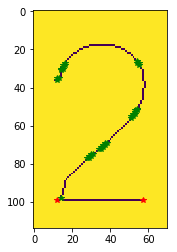

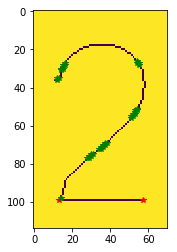

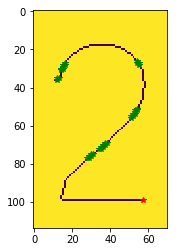

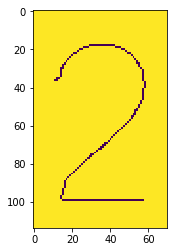

datasets/digit/3.png


<Figure size 432x288 with 0 Axes>

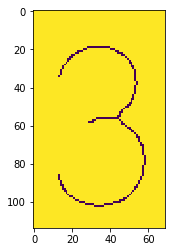

<Figure size 432x288 with 0 Axes>

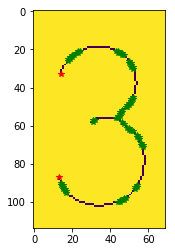

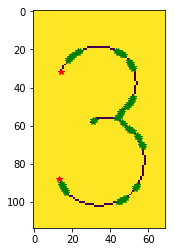

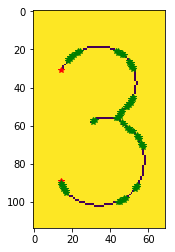

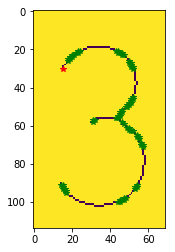

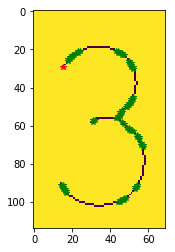

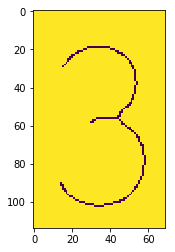

datasets/digit/4.png


<Figure size 432x288 with 0 Axes>

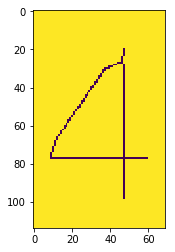

<Figure size 432x288 with 0 Axes>

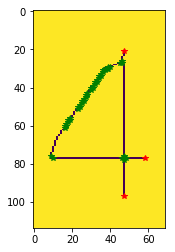

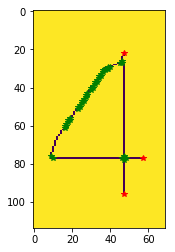

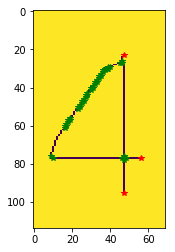

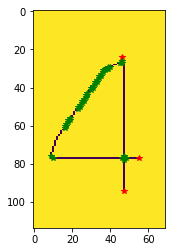

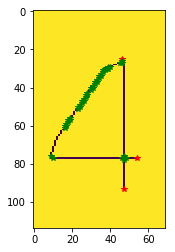

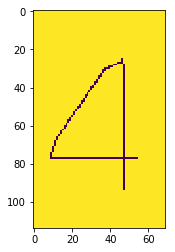

datasets/digit/5.png


<Figure size 432x288 with 0 Axes>

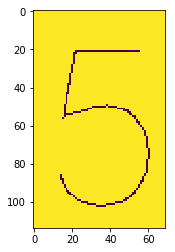

<Figure size 432x288 with 0 Axes>

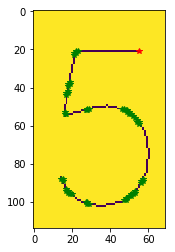

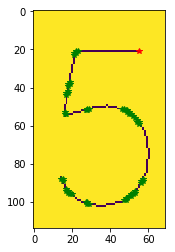

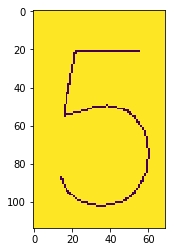

datasets/digit/6.png


<Figure size 432x288 with 0 Axes>

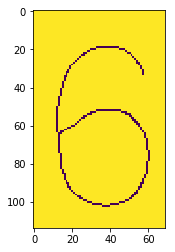

<Figure size 432x288 with 0 Axes>

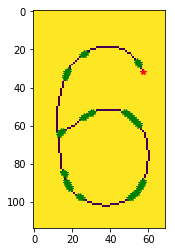

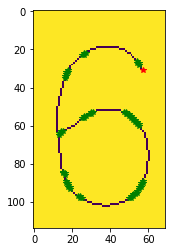

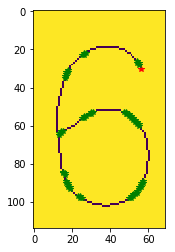

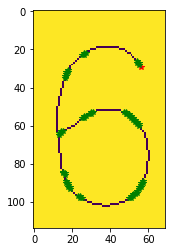

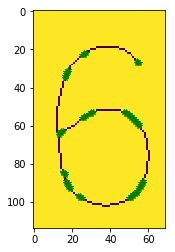

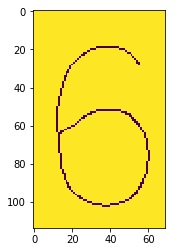

datasets/digit/7.png


<Figure size 432x288 with 0 Axes>

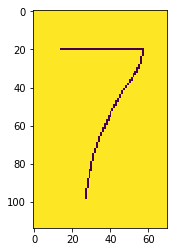

<Figure size 432x288 with 0 Axes>

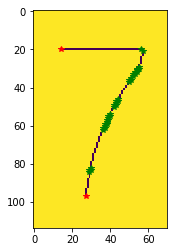

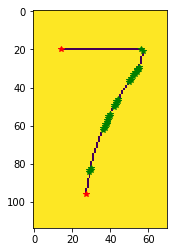

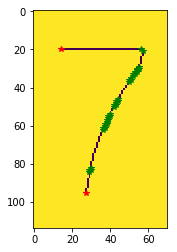

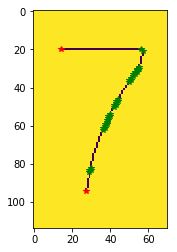

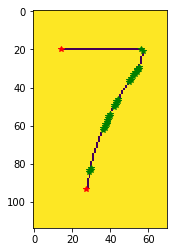

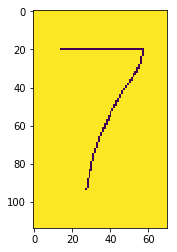

datasets/digit/8.png


<Figure size 432x288 with 0 Axes>

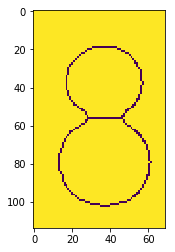

<Figure size 432x288 with 0 Axes>

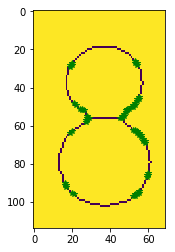

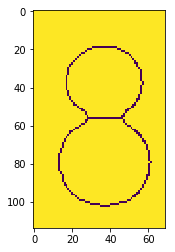

datasets/digit/9.png


<Figure size 432x288 with 0 Axes>

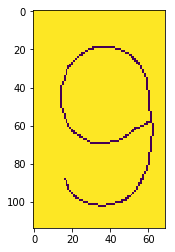

<Figure size 432x288 with 0 Axes>

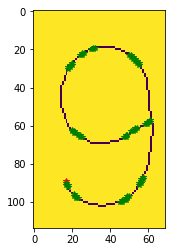

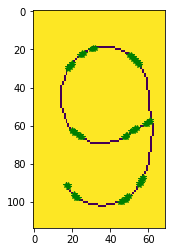

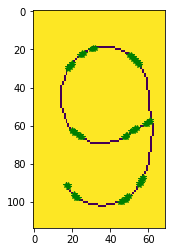

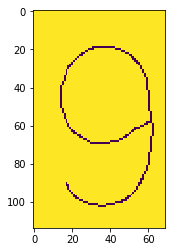

<Figure size 432x288 with 0 Axes>

In [66]:
counter = 0
target = 0
X = []
y = []
for path in path_list:
    print(path)
    figure(counter + 1)
    result = image_thinner.thin_image(convert_image2bw(array(Image.open(path).convert('L'))))
    imshow(result)
    show()
    figure(counter + 2)
    result = prune_image(result)
    imshow(result)
    show()
    figure(counter + 3)
    result = convert2zero_one(result)
    im1 = zoom(result2, 1)
    h = hog(im1, cell_size=(2, 2), cells_per_block=(1, 1), visualise=False, nbins=9, signed_orientation=False, normalise=True)
    counter += 3

    X.append(h)
    y.append(target)
    target += 1
    

In [67]:
y

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Train

In [75]:
X = np.array(X)
X.shape
X = X.reshape(10, -1)
X.shape

(10, 17955)

In [76]:
from sklearn.svm import SVC
from sklearn.neighbors import k

In [77]:
svc = SVC()
svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [78]:
svc.predict(X)

array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9])